In [1]:
!pip install numpy matplotlib scipy scikit-fuzzy deap pymoo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=d3752f4691df399594b528054db947a5085b187480b685a583a62c88c8d3b2f3
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


Fan Speed: 77.4074074074074%


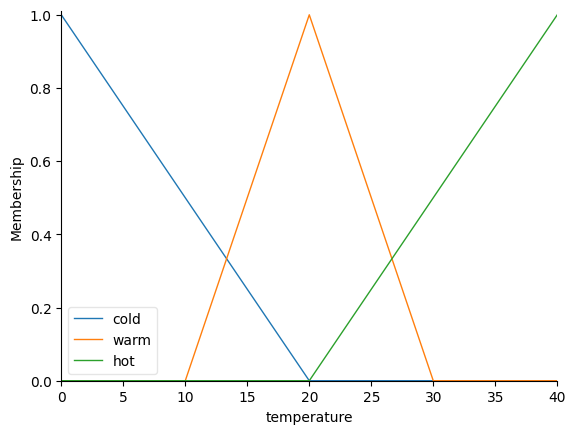

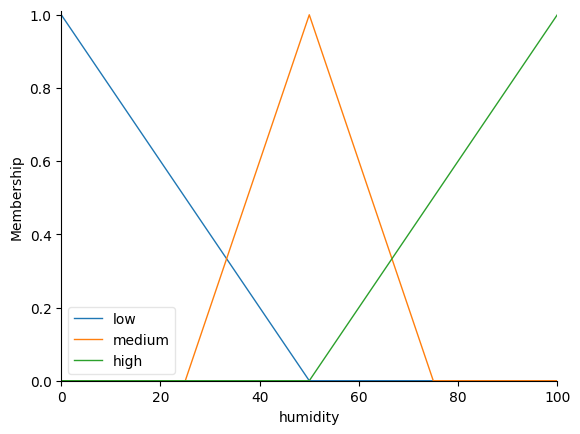

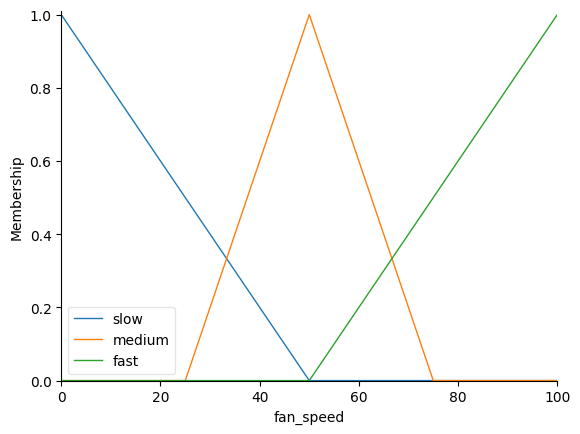

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables (Temperature, Humidity)
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Define output variable (Fan Speed)
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership Functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define Fuzzy Rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['fast'])

# Create Control System
fan_control = ctrl.ControlSystem([rule1, rule2, rule3])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

# Test the System
fan_simulation.input['temperature'] = 30  # Example input
fan_simulation.input['humidity'] = 60
fan_simulation.compute()

# Output Fan Speed
print(f"Fan Speed: {fan_simulation.output['fan_speed']}%")

# Visualize Membership Functions
temperature.view()
humidity.view()
fan_speed.view()
plt.show()